### 使用任意畫圖包畫出 星期幾 v.s 銷售量 的 bar chart。
用91app的資料畫出,星期幾的平均銷售量

##### R 語言使用者的資料視覺化工具有靜態的 Base plotting system（R 語言內建的繪圖功能）跟 ggplot2 套件，
     與動態的 plotly 套件。
##### 而 Python 的視覺化套件有靜態的 matplotlib 跟 seaborn 套件，與動態的 bokeh 套件。

In [1]:
import matplotlib.pyplot as plt  #畫圖package
import pandas as pd              #這個package有一些統計運算，資料可存成data.frame
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [2]:
#使用pandas package 讀取資料，就是已存成data.frame或series的格式了，不須再轉成data.frame
df = pd.read_csv(r'C:\pythonwork\Ntu_Orders.csv')
#df= pd.read_csv(r'C:\Users\s\Desktop\NTU_CSX\week_2\Ntu_Orders.csv')

In [26]:
df.head(2)

,SalesOrderSlaveId,DateId,MemberId,TradesOrderSlaveId,ShopId,SalePageId,TradesOrderGroupCode,TrackSourceTypeDef,TrackChannelTypeDef,TrackDeviceTypeDef,...,PromotionDiscount,EcouponDiscount,SalesOrderSlaveTotalPayment,SalesOrderSlaveDateTime,SalesOrderSlaveStatusDef,PayProfileTypeDef,ShippingProfileTypeDef,EcouponId,IsSalePageGift,new_DateId
0,26914456,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971960,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,-25.0,0.0,374.0,2017-01-03 23:11:47.207,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03
1,26914457,20170103,48D5DE26-236E-4854-8474-B0DCEAFF4F42,26971961,1317,9804,b'q\x14\xa49\xaa\\\xecs\xff6wH\xfbXd\x93\xfbf\...,Web,Brand,Mobile,...,-25.0,0.0,374.0,2017-01-03 23:11:47.223,Finish,SevenEleven,SevenEleven,NaN,False,2017-01-03


In [36]:
print('The names of original data:')
print(df.columns)

The names of original data:
Index(['SalesOrderSlaveId', 'DateId', 'MemberId', 'TradesOrderSlaveId',
       'ShopId', 'SalePageId', 'TradesOrderGroupCode', 'TrackSourceTypeDef',
       'TrackChannelTypeDef', 'TrackDeviceTypeDef', 'LevelOneCategoryName',
       'LevelTwoCategoryName', 'LevelThreeCategoryName',
       'LevelFourCategoryName', 'IsMajor', 'IsGift', 'Quantity', 'UnitPrice',
       'PromotionDiscount', 'EcouponDiscount', 'SalesOrderSlaveTotalPayment',
       'SalesOrderSlaveDateTime', 'SalesOrderSlaveStatusDef',
       'PayProfileTypeDef', 'ShippingProfileTypeDef', 'EcouponId',
       'IsSalePageGift', 'new_DateId'],
      dtype='object')


In [39]:
#pandas package內有個指令可以將時間欄位字串轉成時間格式，也有可以計算時間差的指令
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
#將data存成data.frame，但不同的是new_DateId變成python中的index，就像是R中的factor
#所以無法執行type(data['new_DateId'])，而type(data['Quantity'])則可以
print('The names of new data(add a new variable):')
print(df.columns)

The names of new data(add a new variable):
Index(['SalesOrderSlaveId', 'DateId', 'MemberId', 'TradesOrderSlaveId',
       'ShopId', 'SalePageId', 'TradesOrderGroupCode', 'TrackSourceTypeDef',
       'TrackChannelTypeDef', 'TrackDeviceTypeDef', 'LevelOneCategoryName',
       'LevelTwoCategoryName', 'LevelThreeCategoryName',
       'LevelFourCategoryName', 'IsMajor', 'IsGift', 'Quantity', 'UnitPrice',
       'PromotionDiscount', 'EcouponDiscount', 'SalesOrderSlaveTotalPayment',
       'SalesOrderSlaveDateTime', 'SalesOrderSlaveStatusDef',
       'PayProfileTypeDef', 'ShippingProfileTypeDef', 'EcouponId',
       'IsSalePageGift', 'new_DateId'],
      dtype='object')


In [38]:
#將資料根據日期new_DateId去對Quantity去做總和
data = df.groupby(by='new_DateId')['Quantity'].sum().to_frame()
print(data.head(3))
print('------------------')
#所以必須多加一個新的index 指標
#讓序號重新編排,確保不會有重複的情形
#Note:R裡面則不會有這個問題，所以R程式中不須另外處理它
data.reset_index(level=0, inplace=True)
print(data.head(3))
print('------------------')
print(type(data['new_DateId']))

            Quantity
new_DateId          
2017-01-01      3823
2017-01-02      5105
2017-01-03      3623
------------------
  new_DateId  Quantity
0 2017-01-01      3823
1 2017-01-02      5105
2 2017-01-03      3623
------------------
<class 'pandas.core.series.Series'>


#### 判斷每筆資料日期是星期幾，在計算星期一到日每天的平均銷售量
#### 使用datetime package


In [18]:
import datetime  #與時間有關的package，R裡面是用lubridate這個package
#新增一個變數week到data這個data.frame裡面，就像R裡面的寫法如下，需額外引入dplyr package
# data=mutate(data,week=as.POSIXlt(new_DateId)$wdays)
# 1-6,0表示星期日
data['week'] = data['new_DateId'].apply(lambda x: x.weekday())
print(data.head(2))

  new_DateId  Quantity  week
0 2017-01-01      3823     6
1 2017-01-02      5105     0


In [28]:
#根據不同的星期幾，將Quantity做一個平均，並存成data.frame

#就像R裡面的寫法如下，且需要data.table這個package
#欲使用filter，需先確定data是data.frame的格式，才可使用
#data1=filter(data)%>%group_by(week)%>%summarise(DayMean_Quantity=mean(Quantity))
#注意事項:R中使用了group_by後，資料就會變成data.frame及groupby的格式，需重新將其定義為data.table或data.frame
#的格式，使用的方式就是setDT(data1)轉成data.table格式，或setDF(data1)轉成data.frame格式

#此處Python並未將求得的每星期幾的平均Quantity，另存一個變數，而是沿用原來的Quantity這個變數
data1= data.groupby(by='week')['Quantity'].mean().to_frame()
data1.head(7)

,Quantity
week,
0,5853.759259
1,6707.981481
2,6604.396226
3,5833.264151
4,5534.433962
5,6261.679245
6,6524.407407


In [29]:
#同樣的上面的data1，因為經過groupby(week)，所以week變成index，
#將使用新增一個index來避免這個問題，如下
#Note:R裡面則不會有這個問題，所以R程式中不須另外處理它
data1.reset_index(level=0, inplace=True)#讓序號重新編排,確保不會有重複的情形
data1.head(7)

,week,Quantity
0,0,5853.759259
1,1,6707.981481
2,2,6604.396226
3,3,5833.264151
4,4,5534.433962
5,5,6261.679245
6,6,6524.407407


In [31]:
#將沒有名稱的index重新命名為week_name
data1.index.rename('week_name',inplace=True)
data1.head()

,week,Quantity
week_name,,
0,0,5853.759259
1,1,6707.981481
2,2,6604.396226
3,3,5833.264151
4,4,5534.433962


In [35]:
#填入week_name=0,表示Sunday等
d={0:'Sun', 1:'Mon', 2:'Tues',3:'Wed', 4:'Thur',5:'Fri',6:'Sat'}
data_AvWeek=data1.rename(index=d)
data_AvWeek.head(7)

,week,Quantity
week_name,,
Sun,0,5853.759259
Mon,1,6707.981481
Tues,2,6604.396226
Wed,3,5833.264151
Thur,4,5534.433962
Fri,5,6261.679245
Sat,6,6524.407407


#### 將前面計算出來的每星期幾平均數量的長條圖 

In [42]:
# Choose the names of the bars
bars = ('Sun.','Mon.','Tues.','Wed.','Thur.','Fri.','Sat.')
y_pos = np.arange(len(bars))


In [43]:
np.arange(len(bars))

array([0, 1, 2, 3, 4, 5, 6])

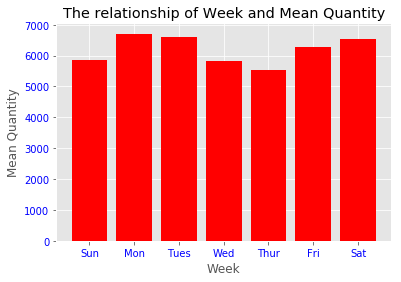

In [66]:
#x軸為week=0,1,6，y軸為Quantity，就像R的plot(x,y)
plt.bar(data_AvWeek['week'],data_AvWeek['Quantity'],color='red')

#設x軸的名稱
plt.xlabel('Week')
#設y軸的名稱
plt.ylabel('Mean Quantity')
#設定圖形的標題
plt.title('The relationship of Week and Mean Quantity')
#設定x軸個長條圖下的變數及文字顏色
#將week=0,1,2,..6轉成文字的Sun,Mon,...Sat
x_name=('Sun','Mon','Tues','Wed','Thur','Fri','Sat')
plt.xticks(data_AvWeek['week'],x_name,color='blue') 
plt.yticks(color='blue')

plt.show() #可不需要此行

# 結論:在憂鬱的星期一二銷售量會增高，而週五準備放假的日子銷售量也會增高